# Stress and Sleep Hours

In [365]:
import pandas as pd

# Load the datasets
stress_data = pd.read_csv('./EMA/stress.csv')
sleep_data = pd.read_csv('./EMA/sleep_hours.csv')

# Display the first few rows of each dataset and their column names
(stress_data.head(), stress_data.columns, sleep_data.head(), sleep_data.columns)


(            day  level  uid
 0    2013-03-27    1.0  u04
 1  2013-03-27.1    4.0  u04
 2    2013-03-28    1.0  u04
 3    2013-03-29    2.0  u04
 4  2013-03-29.1    1.0  u04,
 Index(['day', 'level', 'uid'], dtype='object'),
           day  hours  uid
 0    27/03/13      6  u04
 1    28/03/13      7  u04
 2  28/03/13.1      6  u04
 3    29/03/13      6  u04
 4    30/03/13      7  u04,
 Index(['day', 'hours', 'uid'], dtype='object'))

In [366]:
# Extract unique user IDs from both datasets
unique_uids = pd.concat([stress_data['uid'], sleep_data['uid']]).unique()

# Calculate the average stress level and sleep hours for each uid
average_stress = stress_data.groupby('uid')['level'].mean().reset_index()
average_sleep = sleep_data.groupby('uid')['hours'].mean().reset_index()

# Merge the average values into a single DataFrame on 'uid'
merged_data = pd.merge(average_stress, average_sleep, on='uid', how='inner')
merged_data.columns = ['uid', 'average_stress_level', 'average_sleep_hours']

# Remove rows with NaN values
cleaned_data = merged_data.dropna()


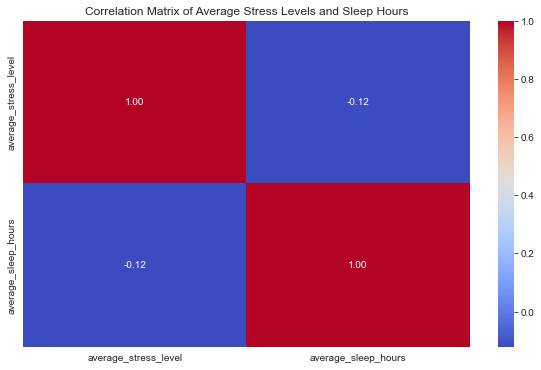

In [367]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix plot
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(cleaned_data[['average_stress_level', 'average_sleep_hours']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Average Stress Levels and Sleep Hours')
plt.show()


# Stress and Sleep Quality

In [368]:
stress_data = pd.read_csv('./EMA/stress.csv')
sleep_data = pd.read_csv('./EMA/sleep_qual.csv')

stress_data = stress_data.dropna()
sleep_data = sleep_data.dropna()

# Calculate the average stress level and sleep quality rate for each uid
average_stress = stress_data.groupby('uid')['level'].mean().reset_index()
average_sleep_quality = sleep_data.groupby('uid')['rate'].mean().reset_index()

# Merge the average values into a single DataFrame on 'uid'
merged_data = pd.merge(average_stress, average_sleep_quality, on='uid', how='inner')
merged_data.columns = ['uid', 'average_stress_level', 'average_sleep_quality']

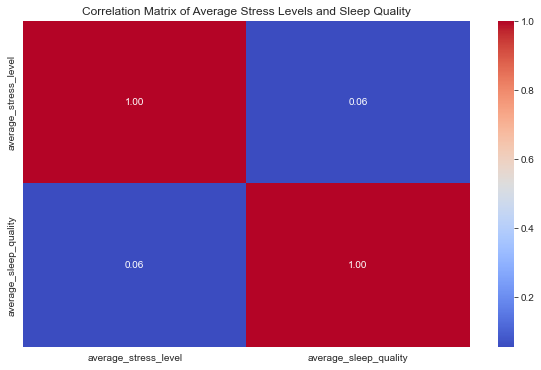

In [369]:
from scipy.stats import pearsonr

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(merged_data[['average_stress_level', 'average_sleep_quality']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Average Stress Levels and Sleep Quality')
plt.show()

# Sleep Hours and PSS

In [370]:
# Load the new datasets for sleep hours and pre-intervention stress scores
sleep_hours_data = pd.read_csv('./EMA/sleep_hours.csv')
pss_pre_data = pd.read_csv('./data/PSS/PSS_Pre.csv')

# Display the first few rows of each dataset and their column names
(sleep_hours_data.head(), sleep_hours_data.columns, pss_pre_data.head(), pss_pre_data.columns)

(          day  hours  uid
 0    27/03/13      6  u04
 1    28/03/13      7  u04
 2  28/03/13.1      6  u04
 3    29/03/13      6  u04
 4    30/03/13      7  u04,
 Index(['day', 'hours', 'uid'], dtype='object'),
    uid type  \
 0  u00  Pre   
 1  u01  Pre   
 2  u02  Pre   
 3  u03  Pre   
 4  u04  Pre   
 
    1. In the last month, how often have you been upset because of something that happened unexpectedly?  \
 0                                                  2                                                      
 1                                                  2                                                      
 2                                                  3                                                      
 3                                                  2                                                      
 4                                                  1                                                      
 
    2. In the last month, how often have

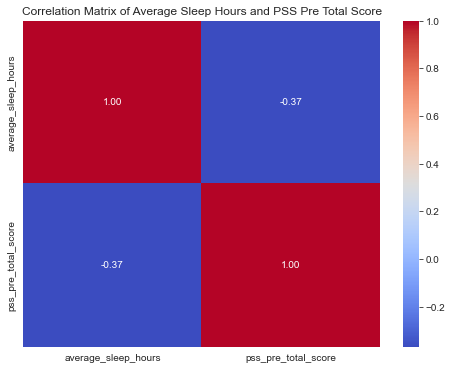

In [371]:
# Calculate the average sleep hours per user
average_sleep = sleep_hours_data.groupby('uid')['hours'].mean().reset_index()

# Since PSS_Pre data already contains a 'total_score' column, we'll use it directly
pss_pre_scores = pss_pre_data[['uid', 'total_score']].dropna()

# Merge the average sleep hours with the PSS scores on 'uid'
merged_data_pss_sleep = pd.merge(average_sleep, pss_pre_scores, on='uid', how='inner')
merged_data_pss_sleep.columns = ['uid', 'average_sleep_hours', 'pss_pre_total_score']

# Perform correlation analysis using Pearson's method
correlation_pss_sleep = merged_data_pss_sleep[['average_sleep_hours', 'pss_pre_total_score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_pss_sleep, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Average Sleep Hours and PSS Pre Total Score')
plt.show()

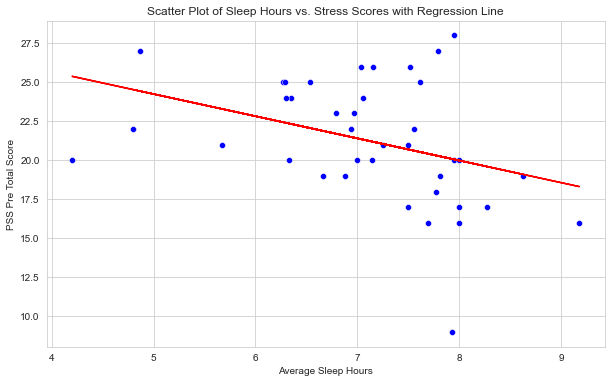

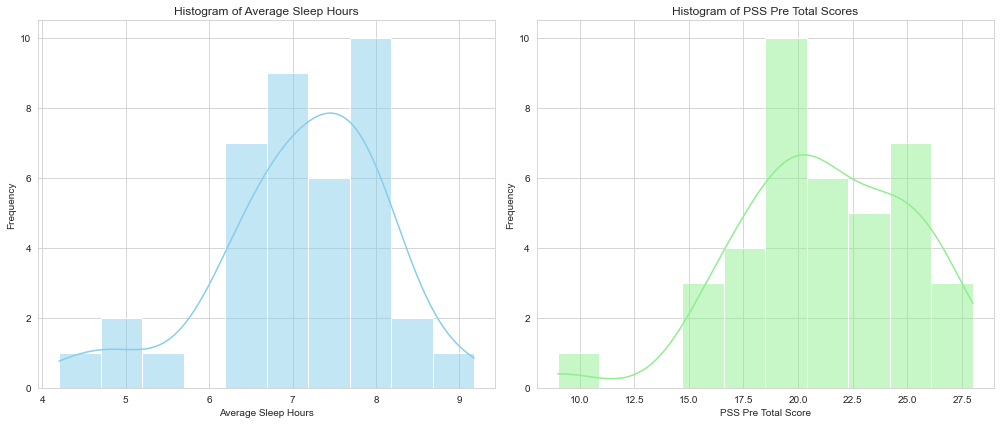

In [372]:
from scipy.stats import linregress

# Scatter plot with linear regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data_pss_sleep, x='average_sleep_hours', y='pss_pre_total_score', color='blue')
slope, intercept, r_value, p_value, std_err = linregress(merged_data_pss_sleep['average_sleep_hours'], merged_data_pss_sleep['pss_pre_total_score'])
line = slope * merged_data_pss_sleep['average_sleep_hours'] + intercept
plt.plot(merged_data_pss_sleep['average_sleep_hours'], line, color='red')  # Red line for the linear regression model
plt.title('Scatter Plot of Sleep Hours vs. Stress Scores with Regression Line')
plt.xlabel('Average Sleep Hours')
plt.ylabel('PSS Pre Total Score')
plt.grid(True)
plt.show()

# Histograms for both variables
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(merged_data_pss_sleep['average_sleep_hours'], bins=10, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Histogram of Average Sleep Hours')
ax[0].set_xlabel('Average Sleep Hours')
ax[0].set_ylabel('Frequency')

sns.histplot(merged_data_pss_sleep['pss_pre_total_score'], bins=10, kde=True, ax=ax[1], color='lightgreen')
ax[1].set_title('Histogram of PSS Pre Total Scores')
ax[1].set_xlabel('PSS Pre Total Score')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [373]:
correlation_coefficient, p_value = pearsonr(merged_data_pss_sleep['average_sleep_hours'], merged_data_pss_sleep['pss_pre_total_score'])

# Print Pearson's correlation coefficient and p-value
print(f"Pearson's correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson's correlation coefficient: -0.36836056196853223
P-value: 0.02103450184628612


# Sleep Quality and PSS

In [374]:
# Load the sleep quality data
sleep_quality_data = pd.read_csv('./EMA/sleep_qual.csv')

# Display the first few rows of the sleep quality data and their column names
sleep_quality_data.head(), sleep_quality_data.columns


(          day  rate  uid
 0  2013-03-27   2.0  u04
 1  2013-03-28   2.0  u04
 2  2013-03-29   2.0  u04
 3  2013-03-30   3.0  u04
 4  2013-03-31   3.0  u04,
 Index(['day', 'rate', 'uid'], dtype='object'))

In [375]:
# Calculate the average sleep quality per user
average_sleep_quality = sleep_quality_data.groupby('uid')['rate'].mean().reset_index()

# We already have the PSS pre-intervention scores loaded as 'pss_pre_scores'
# Merging the average sleep quality with PSS pre-intervention stress scores
merged_data_quality_pss = pd.merge(average_sleep_quality, pss_pre_scores, on='uid', how='inner')
merged_data_quality_pss.columns = ['uid', 'average_sleep_quality', 'pss_pre_total_score']

# Display the merged data for confirmation
merged_data_quality_pss.head()


,uid,average_sleep_quality,pss_pre_total_score
0,u00,1.968750,26.0
1,u01,1.550000,21.0
2,u02,2.066667,19.0
3,u03,1.785714,9.0
4,u04,2.100000,19.0


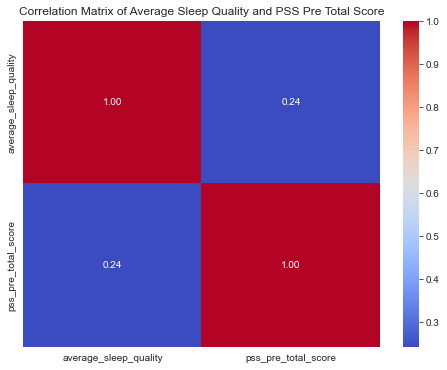

(0.24278169912293807, 0.13642804317733842)

In [376]:
# Compute the correlation matrix for the merged data
correlation_matrix_quality_pss = merged_data_quality_pss[['average_sleep_quality', 'pss_pre_total_score']].corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_quality_pss, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Average Sleep Quality and PSS Pre Total Score')
plt.show()

# Perform Pearson's correlation test
correlation_coefficient_quality_pss, p_value_quality_pss = pearsonr(merged_data_quality_pss['average_sleep_quality'], merged_data_quality_pss['pss_pre_total_score'])

# Print Pearson's correlation coefficient and p-value
correlation_coefficient_quality_pss, p_value_quality_pss


# Sleep Hours and PHQ-9

In [377]:
# Load the new stress data and the PHQ-9 pre-intervention data
phq9_pre_data = pd.read_csv('./data/PHQ-9/PHQ-9_Pre.csv')

# Display the first few rows of each dataset and their column names
(phq9_pre_data.head(), phq9_pre_data.columns)


(   uid type  Little interest or pleasure in doing things  \
 0  u00  Pre                                            0   
 1  u01  Pre                                            1   
 2  u02  Pre                                            2   
 3  u03  Pre                                            0   
 4  u04  Pre                                            1   
 
    Feeling down, depressed, hopeless.  \
 0                                   1   
 1                                   1   
 2                                   1   
 3                                   1   
 4                                   1   
 
    Trouble falling or staying asleep, or sleeping too much.  \
 0                                                  0          
 1                                                  1          
 2                                                  2          
 3                                                  0          
 4                                                  0     

In [378]:
# Use the 'total_score' directly from the PHQ-9 Pre data
phq9_pre_scores = phq9_pre_data[['uid', 'total_score']].dropna()


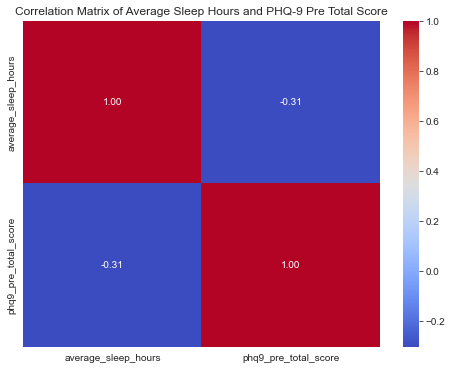

Pearson's correlation coefficient: -0.30511815903343825
P-value: 0.06249896695725175


In [379]:
# We previously calculated average sleep hours as 'average_sleep'
# Merging the average sleep hours with PHQ-9 pre-intervention depression scores
merged_data_sleep_phq9 = pd.merge(average_sleep, phq9_pre_scores, on='uid', how='inner')
merged_data_sleep_phq9.columns = ['uid', 'average_sleep_hours', 'phq9_pre_total_score']

# Compute the correlation matrix for the merged data
correlation_matrix_sleep_phq9 = merged_data_sleep_phq9[['average_sleep_hours', 'phq9_pre_total_score']].corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_sleep_phq9, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Average Sleep Hours and PHQ-9 Pre Total Score')
plt.show()

# Perform Pearson's correlation test
correlation_coefficient_sleep_phq9, p_value_sleep_phq9 = pearsonr(merged_data_sleep_phq9['average_sleep_hours'], merged_data_sleep_phq9['phq9_pre_total_score'])

# Print Pearson's correlation coefficient and p-value
print(f"Pearson's correlation coefficient: {correlation_coefficient_sleep_phq9}")
print(f"P-value: {p_value_sleep_phq9}")


The correlation matrix between average sleep hours and pre-intervention PHQ-9 depression scores shows a correlation coefficient of 
−0.305. This indicates a moderate negative association, suggesting that higher sleep hours might be associated with lower depression scores as measured by the PHQ-9.

The p-value for this correlation is approximately 
0.062, which is slightly above the conventional alpha level of 
0.05. This means that the correlation is not statistically significant at the 0.05 level, although it's quite close, suggesting a potential trend that might become significant with a larger sample size or additional data.

An inability to sleep is one of the key signs of clinical depression [3]. We find a significant negative correlation between sleep duration and pre (r D 0:360; p D 0:025) and post (r D 0:382;p D 0:020) depression; that is, students that sleep less are more likely to be depressed. There is a known link between lack of sleep and depression. One of the common signs of depression is insomnia or an inability to sleep [3].

# Stress and PSS

In [380]:
# Load the sleep quality data
stress_data = pd.read_csv('./EMA/stress.csv')

# Display the first few rows of the sleep quality data and their column names
stress_data.head(), stress_data.columns

(            day  level  uid
 0    2013-03-27    1.0  u04
 1  2013-03-27.1    4.0  u04
 2    2013-03-28    1.0  u04
 3    2013-03-29    2.0  u04
 4  2013-03-29.1    1.0  u04,
 Index(['day', 'level', 'uid'], dtype='object'))

In [381]:
# Calculate the average sleep quality per user
stress_quality = stress_data.groupby('uid')['level'].mean().reset_index()

# We already have the PSS pre-intervention scores loaded as 'pss_pre_scores'
# Merging the average sleep quality with PSS pre-intervention stress scores
merged_data_quality_pss = pd.merge(stress_quality, pss_pre_scores, on='uid', how='inner')
merged_data_quality_pss.columns = ['uid', 'stress_quality', 'pss_pre_total_score']

# Display the merged data for confirmation
merged_data_quality_pss.head()

,uid,stress_quality,pss_pre_total_score
0,u00,2.375000,26.0
1,u01,2.476190,21.0
2,u02,2.214286,19.0
3,u03,3.133333,9.0
4,u04,1.782609,19.0


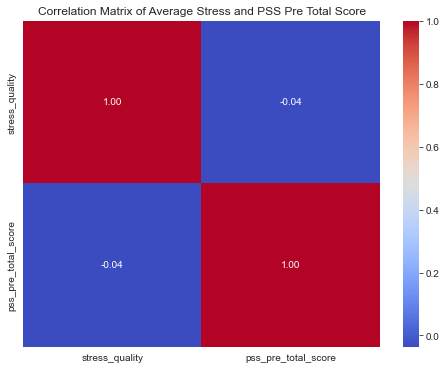

(-0.03598430267529373, 0.8278336871607647)

In [382]:
# Compute the correlation matrix for the merged data
correlation_matrix_quality_pss = merged_data_quality_pss[['stress_quality', 'pss_pre_total_score']].corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_quality_pss, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Average Stress and PSS Pre Total Score')
plt.show()

# Perform Pearson's correlation test
correlation_coefficient_quality_pss, p_value_quality_pss = pearsonr(merged_data_quality_pss['stress_quality'], merged_data_quality_pss['pss_pre_total_score'])

# Print Pearson's correlation coefficient and p-value
correlation_coefficient_quality_pss, p_value_quality_pss

Normality test p-value (exercise group): 0.3585543930530548
Normality test p-value (no exercise group): 0.7830950617790222
t-statistic: -0.4037244130105655
p-value: 0.6891007153659021
Fail to reject the null hypothesis: There is no significant difference in stress levels between exercise and no exercise groups.


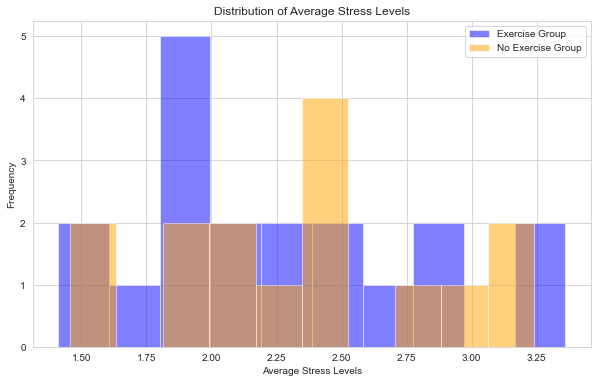

In [383]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Read the data from CSV files
stress_data = pd.read_csv('./EMA/avg_stress.csv')
exercise_data = pd.read_csv('./EMA/exercise_hours.csv')

# Merge the data on UID
merged_data = pd.merge(stress_data, exercise_data, on='UID')

# Create exercise and no_exercise groups
exercise_group = merged_data[merged_data['AvgExerciseHours'] > 1.5]['AvgStress']
no_exercise_group = merged_data[merged_data['AvgExerciseHours'] <= 1.5]['AvgStress']

# Perform normality test
_, p_normality_exercise = stats.shapiro(exercise_group)
_, p_normality_no_exercise = stats.shapiro(no_exercise_group)

# Perform t-test
t_statistic, p_value = stats.ttest_ind(exercise_group, no_exercise_group)

# Define significance level
alpha = 0.05

# Print the results
print(f"Normality test p-value (exercise group): {p_normality_exercise}")
print(f"Normality test p-value (no exercise group): {p_normality_no_exercise}")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Check for statistical significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in stress levels between exercise and no exercise groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in stress levels between exercise and no exercise groups.")

# Plot the data
plt.figure(figsize=(10, 6))
plt.hist(exercise_group, bins=10, alpha=0.5, label='Exercise Group', color='blue')
plt.hist(no_exercise_group, bins=10, alpha=0.5, label='No Exercise Group', color='orange')
plt.xlabel('Average Stress Levels')
plt.ylabel('Frequency')
plt.title('Distribution of Average Stress Levels')
plt.legend()
plt.show()


In [384]:
import pandas as pd
from scipy import stats

# Read the data from CSV files
stress_data = pd.read_csv('./EMA/avg_stress.csv')
exercise_data = pd.read_csv('./EMA/exercise_hours.csv')

# Merge the data on UID
merged_data = pd.merge(stress_data, exercise_data, on='UID')

# Create groups based on exercise intensity levels
exercise_intensity_groups = {
    '<=1': merged_data[merged_data['AvgExerciseHours'] <= 1]['AvgStress'],
    '<=2': merged_data[(merged_data['AvgExerciseHours'] > 1) & (merged_data['AvgExerciseHours'] <= 2)]['AvgStress'],
    '>=2': merged_data[merged_data['AvgExerciseHours'] >= 2]['AvgStress']
}

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(
    exercise_intensity_groups['<=1'],
    exercise_intensity_groups['<=2'],
    exercise_intensity_groups['>=2']
)

# Define significance level
alpha = 0.05

# Print the results
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

# Check for statistical significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in stress levels across different levels of exercise intensity.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in stress levels across different levels of exercise intensity.")


F-statistic: 2.2484138280365142
p-value: 0.12103683592718713
Fail to reject the null hypothesis: There is no significant difference in stress levels across different levels of exercise intensity.


Normality test p-value (exercise group): 0.37445923686027527
Normality test p-value (no exercise group): 0.18505220115184784
t-statistic: -1.2202825616183357
p-value: 0.23127445797886811
Fail to reject the null hypothesis: There is no significant difference in stress levels between exercise and no exercise groups.


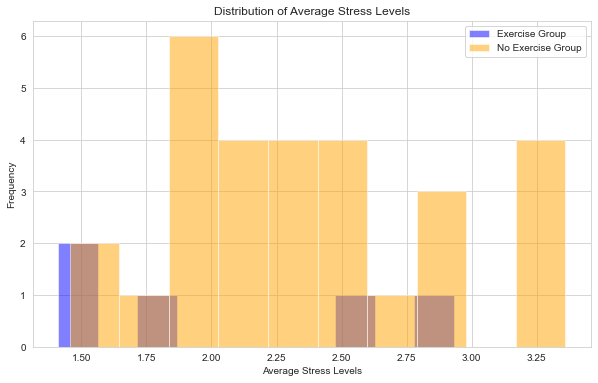

In [385]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Read the data from CSV files
stress_data = pd.read_csv('./EMA/avg_stress.csv')
exercise_data = pd.read_csv('./EMA/exercise_hours_mode.csv')

# Merge the data on UID
merged_data = pd.merge(stress_data, exercise_data, on='UID')

# Create exercise and no_exercise groups
exercise_group = merged_data[merged_data['Mode'] > 1]['AvgStress']
no_exercise_group = merged_data[merged_data['Mode'] <= 1]['AvgStress']

# Perform normality test
_, p_normality_exercise = stats.shapiro(exercise_group)
_, p_normality_no_exercise = stats.shapiro(no_exercise_group)

# Perform t-test
t_statistic, p_value = stats.ttest_ind(exercise_group, no_exercise_group)

# Define significance level
alpha = 0.05

# Print the results
print(f"Normality test p-value (exercise group): {p_normality_exercise}")
print(f"Normality test p-value (no exercise group): {p_normality_no_exercise}")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Check for statistical significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in stress levels between exercise and no exercise groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in stress levels between exercise and no exercise groups.")

# Plot the data
plt.figure(figsize=(10, 6))
plt.hist(exercise_group, bins=10, alpha=0.5, label='Exercise Group', color='blue')
plt.hist(no_exercise_group, bins=10, alpha=0.5, label='No Exercise Group', color='orange')
plt.xlabel('Average Stress Levels')
plt.ylabel('Frequency')
plt.title('Distribution of Average Stress Levels')
plt.legend()
plt.show()


In [386]:
import pandas as pd
from scipy.stats import chi2_contingency

# Data
avg_stress_data = {
    "UID": ["u27", "u14", "u33", "u43", "u51", "u10", "u23", "u04", "u02", "u17", "u36", "u42", "u22", "u35", "u32", "u16", "u24", "u52", "u59", "u01", "u12", "u30", "u46", "u03", "u00", "u58", "u19", "u44", "u53", "u07", "u08", "u45", "u49", "u57"],
    "AvgStress": [1.84, 2.1621621621621623, 2.896551724137931, 1.8831168831168832, 1.4318181818181819, 2.3962264150943398, 1.4545454545454546, 1.8604651162790697, 2.066666666666667, 2.857142857142857, 1.4107142857142858, 3.2413793103448274, 2.4909090909090907, 2.41025641025641, 2.4696969696969697, 2.130841121495327, 1.9487179487179487, 2.4634146341463414, 2.41635687732342, 2.25, 2.2333333333333334, 2.933333333333333, 2.696969696969697, 2.9310344827586206, 2.2972972972972974, 1.8727272727272728, 1.978021978021978, 2.0344827586206895, 1.5526315789473684, 3.2452830188679247, 1.8, 3.1785714285714284, 3.360655737704918, 1.9253731343283582]
}

avg_exercise_data = {
    "UID": ["u04", "u10", "u32", "u07", "u46", "u14", "u35", "u22", "u12", "u57", "u59", "u44", "u30", "u03", "u53", "u23", "u02", "u24", "u45", "u27", "u58", "u17", "u52", "u33", "u43", "u16", "u00", "u49", "u36", "u01", "u51", "u08", "u19", "u42"],
    "AvgExerciseHours": [4.083333333333333, 1.7, 1.36, 2.3846153846153846, 1.6923076923076923, 1.0, 1.4, 2.2, 2.0, 2.4375, 1.1388888888888888, 1.1818181818181819, 1.6666666666666667, 1.875, 1.1904761904761905, 1.2941176470588236, 2.0, 1.8888888888888888, 1.1428571428571428, 1.0, 2.5, 1.1904761904761905, 1.0, 1.1470588235294117, 1.0, 1.868421052631579, 2.0, 1.52, 2.4583333333333335, 1.0, 2.142857142857143, 1.5161290322580645, 2.772727272727273, 1.0909090909090908]
}

avg_stress_df = pd.DataFrame(avg_stress_data)
avg_exercise_df = pd.DataFrame(avg_exercise_data)

# Categorize exercise and stress levels
def categorize_exercise(duration):
    if duration <= 1.5:
        return "no_exercise"
    else:
        return "exercise"

def categorize_stress(level):
    if level < 2.25:
        return "not_stressed"
    else:
        return "stressed"

avg_stress_df['StressCategory'] = avg_stress_df['AvgStress'].apply(categorize_stress)
avg_exercise_df['ExerciseCategory'] = avg_exercise_df['AvgExerciseHours'].apply(categorize_exercise)

# Merge the dataframes on UID
merged_df = pd.merge(avg_stress_df, avg_exercise_df, on='UID')

# Create a contingency table
contingency_table = pd.crosstab(merged_df['StressCategory'], merged_df['ExerciseCategory'])

# Perform Chi-Squared Test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Contingency Table:")
print(contingency_table)
print("\nChi-Squared Test:")
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")
 


Contingency Table:
ExerciseCategory  exercise  no_exercise
StressCategory                         
not_stressed            11            6
stressed                 8            9

Chi-Squared Test:
Chi2 value: 0.4771929824561403
P-value: 0.489696538864409


# Sleep vs Stress


In [387]:
import pandas as pd
from scipy.stats import shapiro, levene
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Read the CSV files
sleep_data = pd.read_csv('./EMA/sleep_hour.csv')
stress_data = pd.read_csv('./EMA/avg_stress.csv')

# Merge the dataframes on UID
merged_data = pd.merge(sleep_data, stress_data, on='UID')

# Shapiro-Wilk test for normality
shapiro_sleep = shapiro(merged_data['AvgSleepHours'])
shapiro_stress = shapiro(merged_data['AvgStress'])

# Levene's test for homogeneity of variances
levene_test = levene(merged_data['AvgSleepHours'], merged_data['AvgStress'])

# Perform t-test
t_statistic, p_value_ttest = stats.ttest_ind(merged_data['AvgSleepHours'], merged_data['AvgStress'])

# Perform Tukey HSD post-hoc test
data = list(merged_data['AvgSleepHours']) + list(merged_data['AvgStress'])
groups = ['Sleep'] * len(merged_data['AvgSleepHours']) + ['Stress'] * len(merged_data['AvgStress'])
tukey_results = pairwise_tukeyhsd(data, groups, alpha=0.05)

# Print the results
print("Shapiro-Wilk test for normality:")
print(f"Sleep - W={shapiro_sleep[0]}, p={shapiro_sleep[1]}")
print(f"Stress - W={shapiro_stress[0]}, p={shapiro_stress[1]}")
print("\nLevene's test for homogeneity of variances:")
print(f"W={levene_test[0]}, p={levene_test[1]}")
print("\nt-test results:")
print(f"t-statistic={t_statistic}, p={p_value_ttest}")
print("\nTukey HSD post-hoc test results:")
print(tukey_results)



Shapiro-Wilk test for normality:
Sleep - W=0.9453846216201782, p=0.08929076790809631
Stress - W=0.9584898948669434, p=0.21964199841022491

Levene's test for homogeneity of variances:
W=2.4819839585588293, p=0.11993859203077593

t-test results:
t-statistic=28.801746165679216, p=4.2931507274710676e-39

Tukey HSD post-hoc test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
 Sleep Stress  -4.9218 0.001 -5.263 -4.5807   True
--------------------------------------------------


In [388]:
import pandas as pd
from scipy.stats import shapiro, levene
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Read the CSV files
sleep_data = pd.read_csv('./EMA/sleep_hour.csv')
stress_data = pd.read_csv('./EMA/avg_stress.csv')

# Define criteria for good and bad sleep
cutoff_sleep_hours = 7

# Create groups based on sleep quality
good_sleep = sleep_data[sleep_data['AvgSleepHours'] >= cutoff_sleep_hours]
bad_sleep = sleep_data[sleep_data['AvgSleepHours'] < cutoff_sleep_hours]

# Merge with stress data
good_sleep = pd.merge(good_sleep, stress_data, on='UID')
bad_sleep = pd.merge(bad_sleep, stress_data, on='UID')

# Shapiro-Wilk test for normality
shapiro_good_sleep = shapiro(good_sleep['AvgStress'])
shapiro_bad_sleep = shapiro(bad_sleep['AvgStress'])

# Levene's test for homogeneity of variances
levene_test = levene(good_sleep['AvgStress'], bad_sleep['AvgStress'])

# Perform t-test
t_statistic, p_value_ttest = stats.ttest_ind(good_sleep['AvgStress'], bad_sleep['AvgStress'])

# Perform Tukey HSD post-hoc test
data = list(good_sleep['AvgStress']) + list(bad_sleep['AvgStress'])
groups = ['Good Sleep'] * len(good_sleep) + ['Bad Sleep'] * len(bad_sleep)
tukey_results = pairwise_tukeyhsd(data, groups, alpha=0.05)

# Print the results
print("Shapiro-Wilk test for normality:")
print(f"Good Sleep - W={shapiro_good_sleep[0]}, p={shapiro_good_sleep[1]}")
print(f"Bad Sleep - W={shapiro_bad_sleep[0]}, p={shapiro_bad_sleep[1]}")
print("\nLevene's test for homogeneity of variances:")
print(f"W={levene_test[0]}, p={levene_test[1]}")
print("\nt-test results:")
print(f"t-statistic={t_statistic}, p={p_value_ttest}")
print("\nTukey HSD post-hoc test results:")
print(tukey_results)


Shapiro-Wilk test for normality:
Good Sleep - W=0.9491901993751526, p=0.2815035283565521
Bad Sleep - W=0.9628236293792725, p=0.8063539266586304

Levene's test for homogeneity of variances:
W=0.4550676181292276, p=0.5047830491928704

t-test results:
t-statistic=-1.3771740033680324, p=0.17801638432516528

Tukey HSD post-hoc test results:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2   meandiff p-adj lower  upper  reject
--------------------------------------------------------
Bad Sleep Good Sleep  -0.2715 0.178 -0.673 0.1301  False
--------------------------------------------------------


In [389]:
import pandas as pd
from scipy.stats import shapiro, levene
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Read the CSV files
sleep_data = pd.read_csv('./EMA/sleep_hour.csv')
stress_data = pd.read_csv('./EMA/avg_stress.csv')

# Define criteria for stressed and not stressed
cutoff_stress_level = 2.5

# Create groups based on stress level
stressed = stress_data[stress_data['AvgStress'] >= cutoff_stress_level]
not_stressed = stress_data[stress_data['AvgStress'] < cutoff_stress_level]

# Merge with sleep data
stressed = pd.merge(stressed, sleep_data, on='UID')
not_stressed = pd.merge(not_stressed, sleep_data, on='UID')

# Shapiro-Wilk test for normality
shapiro_stressed = shapiro(stressed['AvgSleepHours'])
shapiro_not_stressed = shapiro(not_stressed['AvgSleepHours'])

# Levene's test for homogeneity of variances
levene_test = levene(stressed['AvgSleepHours'], not_stressed['AvgSleepHours'])

# Perform t-test
t_statistic, p_value_ttest = stats.ttest_ind(stressed['AvgSleepHours'], not_stressed['AvgSleepHours'])

# Perform Tukey HSD post-hoc test
data = list(stressed['AvgSleepHours']) + list(not_stressed['AvgSleepHours'])
groups = ['Stressed'] * len(stressed) + ['Not Stressed'] * len(not_stressed)
tukey_results = pairwise_tukeyhsd(data, groups, alpha=0.05)

# Print the results
print("Shapiro-Wilk test for normality:")
print(f"Stressed - W={shapiro_stressed[0]}, p={shapiro_stressed[1]}")
print(f"Not Stressed - W={shapiro_not_stressed[0]}, p={shapiro_not_stressed[1]}")
print("\nLevene's test for homogeneity of variances:")
print(f"W={levene_test[0]}, p={levene_test[1]}")
print("\nt-test results:")
print(f"t-statistic={t_statistic}, p={p_value_ttest}")
print("\nTukey HSD post-hoc test results:")
print(tukey_results)


Shapiro-Wilk test for normality:
Stressed - W=0.9143933057785034, p=0.3478460907936096
Not Stressed - W=0.9513830542564392, p=0.2693217694759369

Levene's test for homogeneity of variances:
W=0.009396665895458341, p=0.9233814927020023

t-test results:
t-statistic=-1.6666879254151277, p=0.10533653989776852

Tukey HSD post-hoc test results:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1     group2  meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
Not Stressed Stressed  -0.5265 0.1053 -1.1699 0.1169  False
-----------------------------------------------------------


# Sleep, Stress, Exercise and GPA

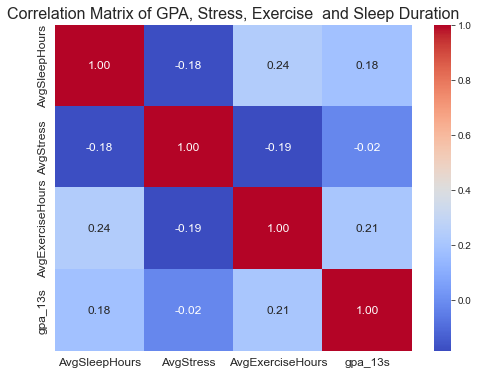

In [390]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV files
sleep_data = pd.read_csv('./EMA/sleep_hour.csv')
stress_data = pd.read_csv('./EMA/avg_stress.csv')
exercise_data = pd.read_csv('./EMA/exercise_hours.csv')
gpa_data = pd.read_csv('./education/grades.csv')

# Merge the dataframes on UID
merged_data = pd.merge(sleep_data, stress_data, on='UID')
merged_data = pd.merge(merged_data, exercise_data, on='UID')

# Only take the gpa_13s column from the GPA data and Merge with the existing data
merged_data = pd.merge(merged_data, gpa_data[['uid', 'gpa_13s']], left_on='UID', right_on='uid')

# Correlation matrix
correlation_matrix = merged_data[['AvgSleepHours', 'AvgStress', 'AvgExerciseHours', 'gpa_13s']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix of GPA, Stress, Exercise  and Sleep Duration', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



In [391]:
# Correlation analysis
correlation_coefficient_sleep, p_value_sleep = stats.pearsonr(merged_data['AvgSleepHours'], merged_data['gpa_13s'])
correlation_coefficient_stress, p_value_stress = stats.pearsonr(merged_data['AvgStress'], merged_data['gpa_13s'])
correlation_coefficient_exercise, p_value_exercise = stats.pearsonr(merged_data['AvgExerciseHours'], merged_data['gpa_13s'])

# Print the results
print(f"Correlation coefficient between Sleep and GPA: {correlation_coefficient_sleep}, p-value: {p_value_sleep}")
print(f"Correlation coefficient between Stress and GPA: {correlation_coefficient_stress}, p-value: {p_value_stress}")
print(f"Correlation coefficient between Exercise and GPA: {correlation_coefficient_exercise}, p-value: {p_value_exercise}")


Correlation coefficient between Sleep and GPA: 0.18087710647304345, p-value: 0.4088459688073123
Correlation coefficient between Stress and GPA: -0.01982860652397371, p-value: 0.9284461234841591
Correlation coefficient between Exercise and GPA: 0.20717620480830695, p-value: 0.34286492009666636


In [392]:
import statsmodels.api as sm

# Regression analysis
X = merged_data[['AvgStress', 'AvgSleepHours', 'AvgExerciseHours']]
X = sm.add_constant(X)  # Add a constant term to the predictor
y = merged_data['gpa_13s']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                gpa_13s   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                 -0.085
Method:                 Least Squares   F-statistic:                    0.4244
Date:                Sat, 04 May 2024   Prob (F-statistic):              0.738
Time:                        15:15:18   Log-Likelihood:                -28.926
No. Observations:                  23   AIC:                             65.85
Df Residuals:                      19   BIC:                             70.39
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.6530      2.122  

# Stress

In [393]:
import pandas as pd

stress_data = pd.read_csv('./EMA/stress.csv')

df = pd.DataFrame(stress_data)

df['day'] = df['day'].str.split('.').str[0]

# Create a mapping dictionary
stress_mapping = {1: 3, 2: 4, 3: 5, 4: 2, 5: 1}

# Apply the mapping to your DataFrame
df['level'] = df['level'].map(stress_mapping)

df

,day,level,uid
0,2013-03-27,3.0,u04
1,2013-03-27,2.0,u04
2,2013-03-28,3.0,u04
3,2013-03-29,4.0,u04
4,2013-03-29,3.0,u04
...,...,...,...
1136,2013-04-18,3.0,u35
1137,2013-04-29,5.0,u35
1138,2013-04-29,3.0,u35
1139,2013-04-30,3.0,u35


In [394]:
df['month'] = pd.to_datetime(df['day']).dt.month
df['year'] = pd.to_datetime(df['day']).dt.year

df

,day,level,uid,month,year
0,2013-03-27,3.0,u04,3,2013
1,2013-03-27,2.0,u04,3,2013
2,2013-03-28,3.0,u04,3,2013
3,2013-03-29,4.0,u04,3,2013
4,2013-03-29,3.0,u04,3,2013
...,...,...,...,...,...
1136,2013-04-18,3.0,u35,4,2013
1137,2013-04-29,5.0,u35,4,2013
1138,2013-04-29,3.0,u35,4,2013
1139,2013-04-30,3.0,u35,4,2013


In [395]:
# get unique months

unique_months = df['month'].unique()
unique_years = df['year'].unique()

# get the avg stress level for each month

avg_stress = df.groupby(['month'])['level'].mean().reset_index()

avg_stress

,month,level
0,3,2.739884
1,4,3.110811
2,5,3.223744
3,6,2.250000


In [396]:
# divide the time frame into 3 parts
# months 3 and 4, months 5, and month 6

# get the average stress level for each uid for each time frame
avg_stress['time_frame'] = pd.cut(avg_stress['month'], bins=[2, 3, 4, 5], labels=['March', 'April', 'May'])

avg_stress

,month,level,time_frame
0,3,2.739884,March
1,4,3.110811,April
2,5,3.223744,May
3,6,2.250000,NaN


In [397]:
# take the average stress level for each time frame
average_stress = avg_stress.groupby(['time_frame'])['level'].mean().reset_index()

average_stress

,time_frame,level
0,March,2.739884
1,April,3.110811
2,May,3.223744


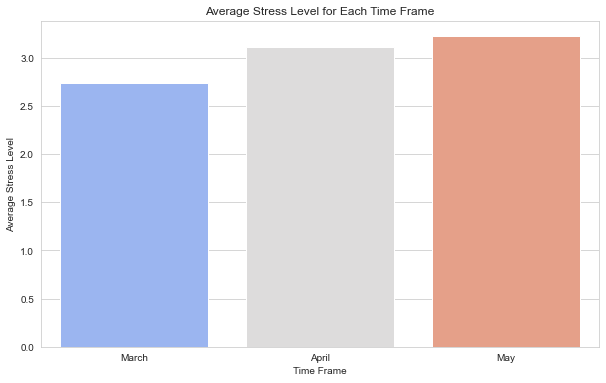

In [398]:
# now plot the average stress level for each time frame

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='time_frame', y='level', data=average_stress, palette='coolwarm')
plt.title('Average Stress Level for Each Time Frame')
plt.xlabel('Time Frame')
plt.ylabel('Average Stress Level')
plt.show()


# Sleep 

In [399]:
import pandas as pd

stress_data = pd.read_csv('./EMA/sleep_hours.csv')

df = pd.DataFrame(stress_data)

df['day'] = df['day'].str.split('.').str[0]

df

,day,hours,uid
0,27/03/13,6,u04
1,28/03/13,7,u04
2,28/03/13,6,u04
3,29/03/13,6,u04
4,30/03/13,7,u04
...,...,...,...
928,16/04/13,7,u35
929,18/04/13,6,u35
930,29/04/13,8,u35
931,30/04/13,6,u35


In [400]:
df['day'] = pd.to_datetime(df['day'], format='%d/%m/%y')

# Extract month from the 'day' column
df['month'] = df['day'].dt.month

# Display the DataFrame with the new 'month' column
print(df)

           day  hours  uid  month
0   2013-03-27      6  u04      3
1   2013-03-28      7  u04      3
2   2013-03-28      6  u04      3
3   2013-03-29      6  u04      3
4   2013-03-30      7  u04      3
..         ...    ...  ...    ...
928 2013-04-16      7  u35      4
929 2013-04-18      6  u35      4
930 2013-04-29      8  u35      4
931 2013-04-30      6  u35      4
932 2013-05-02      6  u35      5

[933 rows x 4 columns]


In [401]:
# get unique months

unique_months = df['month'].unique()
unique_years = df['year'].unique()

# get the avg sleep hours for each month

avg_sleep = df.groupby(['month'])['hours'].mean().reset_index()

avg_sleep

KeyError: 'year'

In [ ]:
# get the average stress level for each uid for each time frame
avg_sleep['time_frame'] = pd.cut(avg_sleep['month'], bins=[2, 3, 4, 5], labels=['March', 'April', 'May'])

avg_sleep

,month,hours,time_frame
0,3,7.286765,March
1,4,6.958403,April
2,5,8.101064,May
3,6,9.875000,NaN


In [ ]:
# take the average stress level for each time frame
average_sleep = avg_sleep.groupby(['time_frame'])['hours'].mean().reset_index()

average_sleep

,time_frame,hours
0,March,7.286765
1,April,6.958403
2,May,8.101064


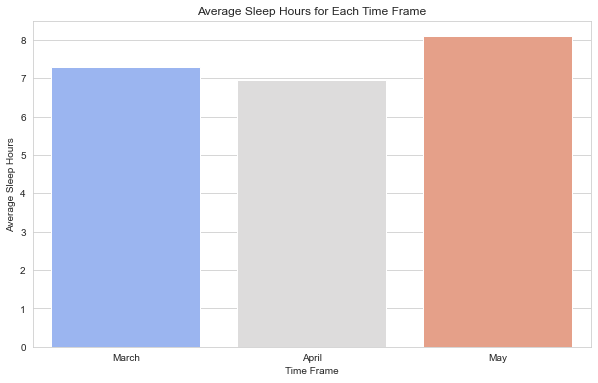

In [ ]:
# now plot the average sleep hours for each time frame

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='time_frame', y='hours', data=average_sleep, palette='coolwarm')
plt.title('Average Sleep Hours for Each Time Frame')
plt.xlabel('Time Frame')
plt.ylabel('Average Sleep Hours')
plt.show()